# **CHURNING - DESERCIÓN DE CLIENTES**

En este proyecto se tiene un dataset con datos sobre la deserción de clientes etiquedo como Churn, el cual se usará para entrenar un algorito que sea capaz de predecir los clientes que se puedan dar de baja del servicio.

El churning, o "tasa de cancelación" en español, se refiere al proceso mediante el cual los clientes dejan de usar un producto o servicio en un período de tiempo determinado. Es una métrica clave en industrias como telecomunicaciones, banca, suscripciones en línea, servicios SaaS, entre otras.

El churn es crucial porque adquirir un nuevo cliente es mucho más costoso que retener a uno existente. Además, un churn alto indica posibles problemas con el producto, servicio o experiencia del cliente.

Por lo cual este proyecto puede servir como guía para posibles implementaciones en ISPs o diferentes tipos de empresas que ofrecen un servicio de tecnología

# **Instanciar e Importar**

In [1]:
#importamos las librerias necesarias
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import variation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#instanciamos el dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Churn.csv')

In [4]:
#Dimensiones del Data Frame
df.shape

(5243, 21)

In [5]:
#Información general del Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5243 non-null   object 
 1   gender            5243 non-null   object 
 2   SeniorCitizen     5243 non-null   object 
 3   Partner           5243 non-null   object 
 4   Dependents        5243 non-null   object 
 5   tenure            5243 non-null   int64  
 6   PhoneService      5243 non-null   object 
 7   MultipleLines     5243 non-null   object 
 8   InternetService   5243 non-null   object 
 9   OnlineSecurity    5243 non-null   object 
 10  OnlineBackup      5243 non-null   object 
 11  DeviceProtection  5243 non-null   object 
 12  TechSupport       5243 non-null   object 
 13  StreamingTV       5243 non-null   object 
 14  StreamingMovies   5243 non-null   object 
 15  Contract          5243 non-null   object 
 16  PaperlessBilling  5243 non-null   object 


In [6]:
#Los primeros registros del Data Frame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1951-IEYXM,Male,No,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.60,6441.85,No
1,7041-TXQJH,Female,No,No,No,37,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.20,1478.85,No
2,0621-HJWXJ,Female,No,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),81.55,5029.05,No
3,6133-OZILE,Female,No,No,No,18,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,35.20,607.3,No
4,3657-COGMW,Female,Yes,No,No,52,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),108.10,5839.3,No


En primera instancia al observar el dataset se tiene que existe 21 columnas y 5243 filas, de las cuales se puede obtener las siguientes características:

1.   customerID - Id del consumidor
2.   gender - Género
3.   SeniorCitizen - Jubilado
4.   Partner - El cliente tiene o no una pareja
5.   Dependets - El cliente tiene o no hijos o dependientes
6.   tenure - tiempo de permanencia del cliente con la empresa
7.   Phoneservices - Servicio de teléfono
8.   Multiplelines - Lineas múltiples de teléfono
10.  InternetService - Servicio de Internet
11.  OnlineSecurity - Servicio de ciberseguridad
12.  DeviceProtection - Protección de dispositivos
13.  TechSupport - Soporte técnico
14.  StreamingTV - Televisión en streaming
15.  StreamingMovie - Películas en streaming
16.  Contract - Duración del contrato
17.  PaperlessBilling - Factura en papel
18.  PaymenthMethod - Metodo de pago
19.  MonthlyCharges - Monto de paga mensual
20.  TotalCharges - Monto total de paga
21.  Churn - Deserción del servicio



# **EDA - ANALISIS EXPLORATORIO DE DATOS**

A primera vista parece que el dataset está completo, pero contiene algunos errores como columnas que son tipo float pero los reconoce como object, por lo cual nos pusimos en la tarea de transformar dichos valores, en las cuales existen valores en blanco o de cadenas vacias (' '), para lo que realizamos la imputación de valores, rellenando con NAN estos valores.

In [7]:
#Remplaza las cadenas vacías con valores NAN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [8]:

df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [9]:
nan_counts = df.isnull().sum()
print(nan_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


Al realizar un conteo de nulos en las categorías del dataset, verificamos que la columna TotalCharges contiene 8 valores nulos, que fueron rellenados con NAN. Para lo cual es muy importante antes de realizar una imputación de valores vericar la distribución de esta característica.

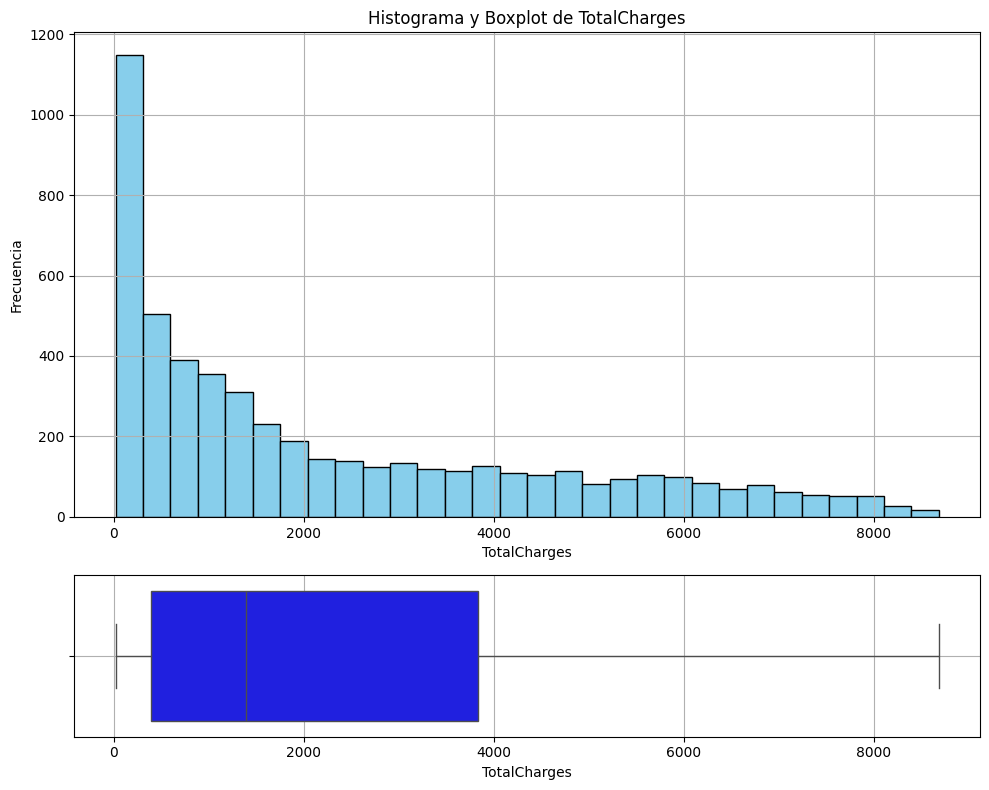

In [10]:
# Filtrar valores nulos para evitar errores
df_clean = df['TotalCharges'].dropna()

# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Histograma
axes[0].hist(df_clean, bins=30, edgecolor='black', color='skyblue')
axes[0].set_xlabel('TotalCharges')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma y Boxplot de TotalCharges')
axes[0].grid(True)

# Boxplot
sns.boxplot(x=df_clean, color='blue', ax=axes[1])
axes[1].set_xlabel('TotalCharges')
axes[1].grid(True)

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

La distribucion se encuentra sesgada con una cola muy larga hacia la derecha concentrando un mayor número de sus valores a la izquierda, el imputar con valores como la media podrían sesgar los resultados, en casos como estos es recomendable indagar sobre los valores faltantes, pero dado que en comparación con el número de muestras existentes es muy grande en comparación con las ausentes, se podría desestimar el metodo para rellenar los valores.

Por el tipo de distribución y su consentación de valores, un abordaje mas correcto sería la moda o la mediana que sus valores promedios, incluso podríamos hacer uso de una regresión lineal para poder rellenar estos valores, pero por lo mencionado que son pocos los valores imputados se realizará la imputación con la mediana.

In [11]:
#Rellena con la mediana los valores NAN
median_value = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value, inplace=True)

<ipython-input-11-69988a230601>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_value, inplace=True)


In [12]:
'''
(Opcional) rellenar valores con la regresión lineal

from sklearn.linear_model import LinearRegression
df_notnull = df.dropna(subset=['TotalCharges'])
df_null = df[df['TotalCharges'].isnull()]

X_train = df_notnull[['MonthlyCharges', 'tenure']]
y_train = df_notnull['TotalCharges']
model = LinearRegression()
model.fit(X_train, y_train)

df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = model.predict(df_null[['MonthlyCharges', 'tenure']])
'''

"\n(Opcional) rellenar valores con la regresión lineal\n\nfrom sklearn.linear_model import LinearRegression\ndf_notnull = df.dropna(subset=['TotalCharges'])\ndf_null = df[df['TotalCharges'].isnull()]\n\nX_train = df_notnull[['MonthlyCharges', 'tenure']]\ny_train = df_notnull['TotalCharges']\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\ndf.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = model.predict(df_null[['MonthlyCharges', 'tenure']])\n"

In [13]:
#Conteo de valores nulos
nan_counts = df.isnull().sum()
print(nan_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Una vez imputados los valores se verifican los estadisticos de los valores númericos que contiene el dataset.

In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5243.000000,5243.000000,5243.000000
mean,32.324433,64.827303,2290.883912
std,24.623774,30.185260,2283.499858
min,0.000000,18.400000,18.850000
25%,9.000000,35.400000,392.900000
50%,29.000000,70.500000,1386.800000
75%,55.000000,89.950000,3831.850000
max,72.000000,118.750000,8684.800000


Se grafica para tener un mayor detalle de estas caracteristicas y poder detectar algun sesgo de información o alteraciones u outliers que afecten el modelado.

In [15]:
def plot_boxplots(df):
    # Filtrar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        print("No hay columnas numéricas en el DataFrame.")
        return

    # Definir el número de columnas y calcular las filas necesarias
    num_cols = 3
    num_rows = math.ceil(len(numeric_cols) / num_cols)

    # Configuración del tamaño de la figura
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para fácil iteración

    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Eliminar los ejes vacíos si hay más subplots que columnas
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

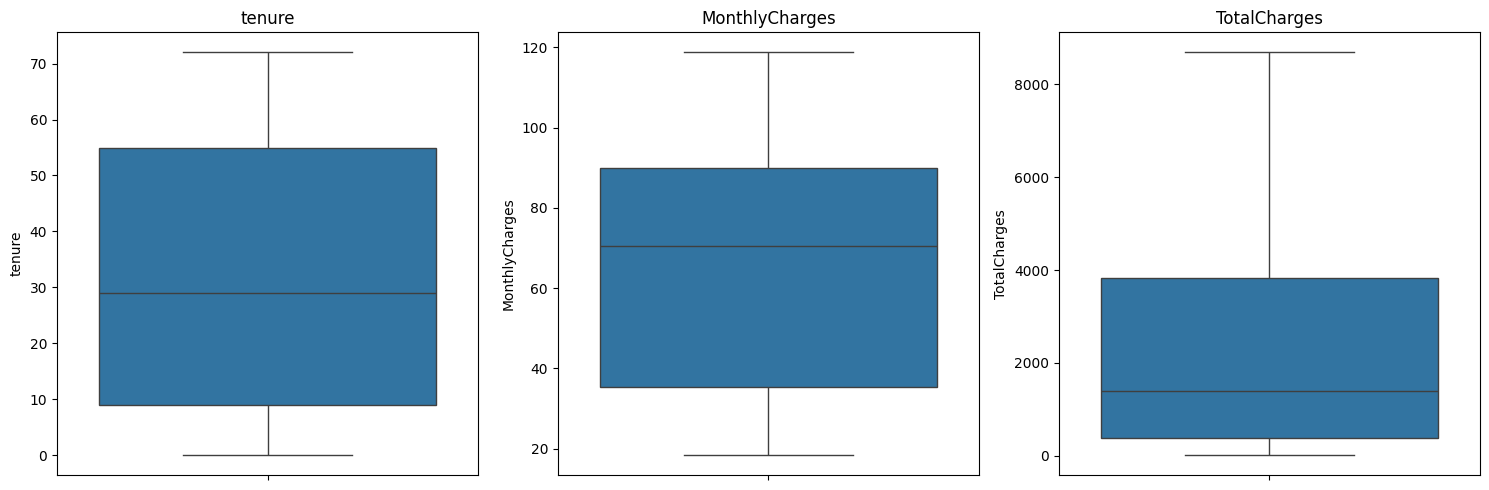

In [16]:
plot_boxplots(df)

In [17]:
def plot_histograms(df):
    # Filtrar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        print("No hay columnas numéricas en el DataFrame.")
        return

    num_cols = 3
    num_rows = math.ceil(len(numeric_cols) / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para fácil iteración

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])  # kde=True agrega una línea de densidad
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Elimina los ejes vacíos si hay más subplots que columnas
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

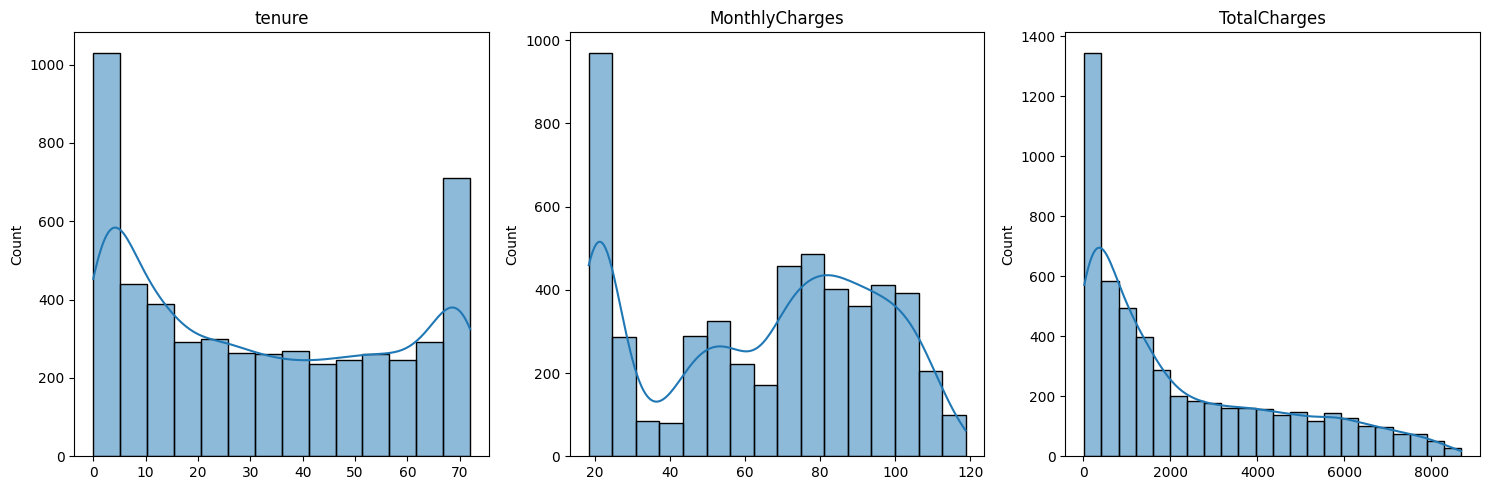

In [18]:
plot_histograms(df)

No existen outliers y no se ve mayores alteraciones en sus distribuciones. Se prosigue con los valores categoricos.

In [19]:
from math import ceil
def graficos_eda_categoricos(cat, columnas_excluir=[]):
    # Filtrar el DataFrame para excluir las columnas numéricas y las especificadas
    cat = cat.drop(columns=columnas_excluir)  # Excluir las columnas manualmente
    cat = cat.select_dtypes(exclude=['number'])  # Excluir las columnas numéricas

    filas = ceil(cat.shape[1] / 3)
    f, ax = plt.subplots(nrows=filas, ncols=3, figsize=(12, filas * 3))
    ax = ax.flat

    # Crea los gráficos de barras para cada columna
    for cada, variable in enumerate(cat.columns):
        cat[variable].value_counts().plot.barh(ax=ax[cada], color='skyblue')
        ax[cada].set_title(variable, fontsize=10, fontweight="bold")  # Fuente más pequeña
        ax[cada].tick_params(labelsize=8)  # Ajustamos el tamaño de las etiquetas

    # Ajusta el layout para evitar superposición
    plt.tight_layout()
    plt.show()

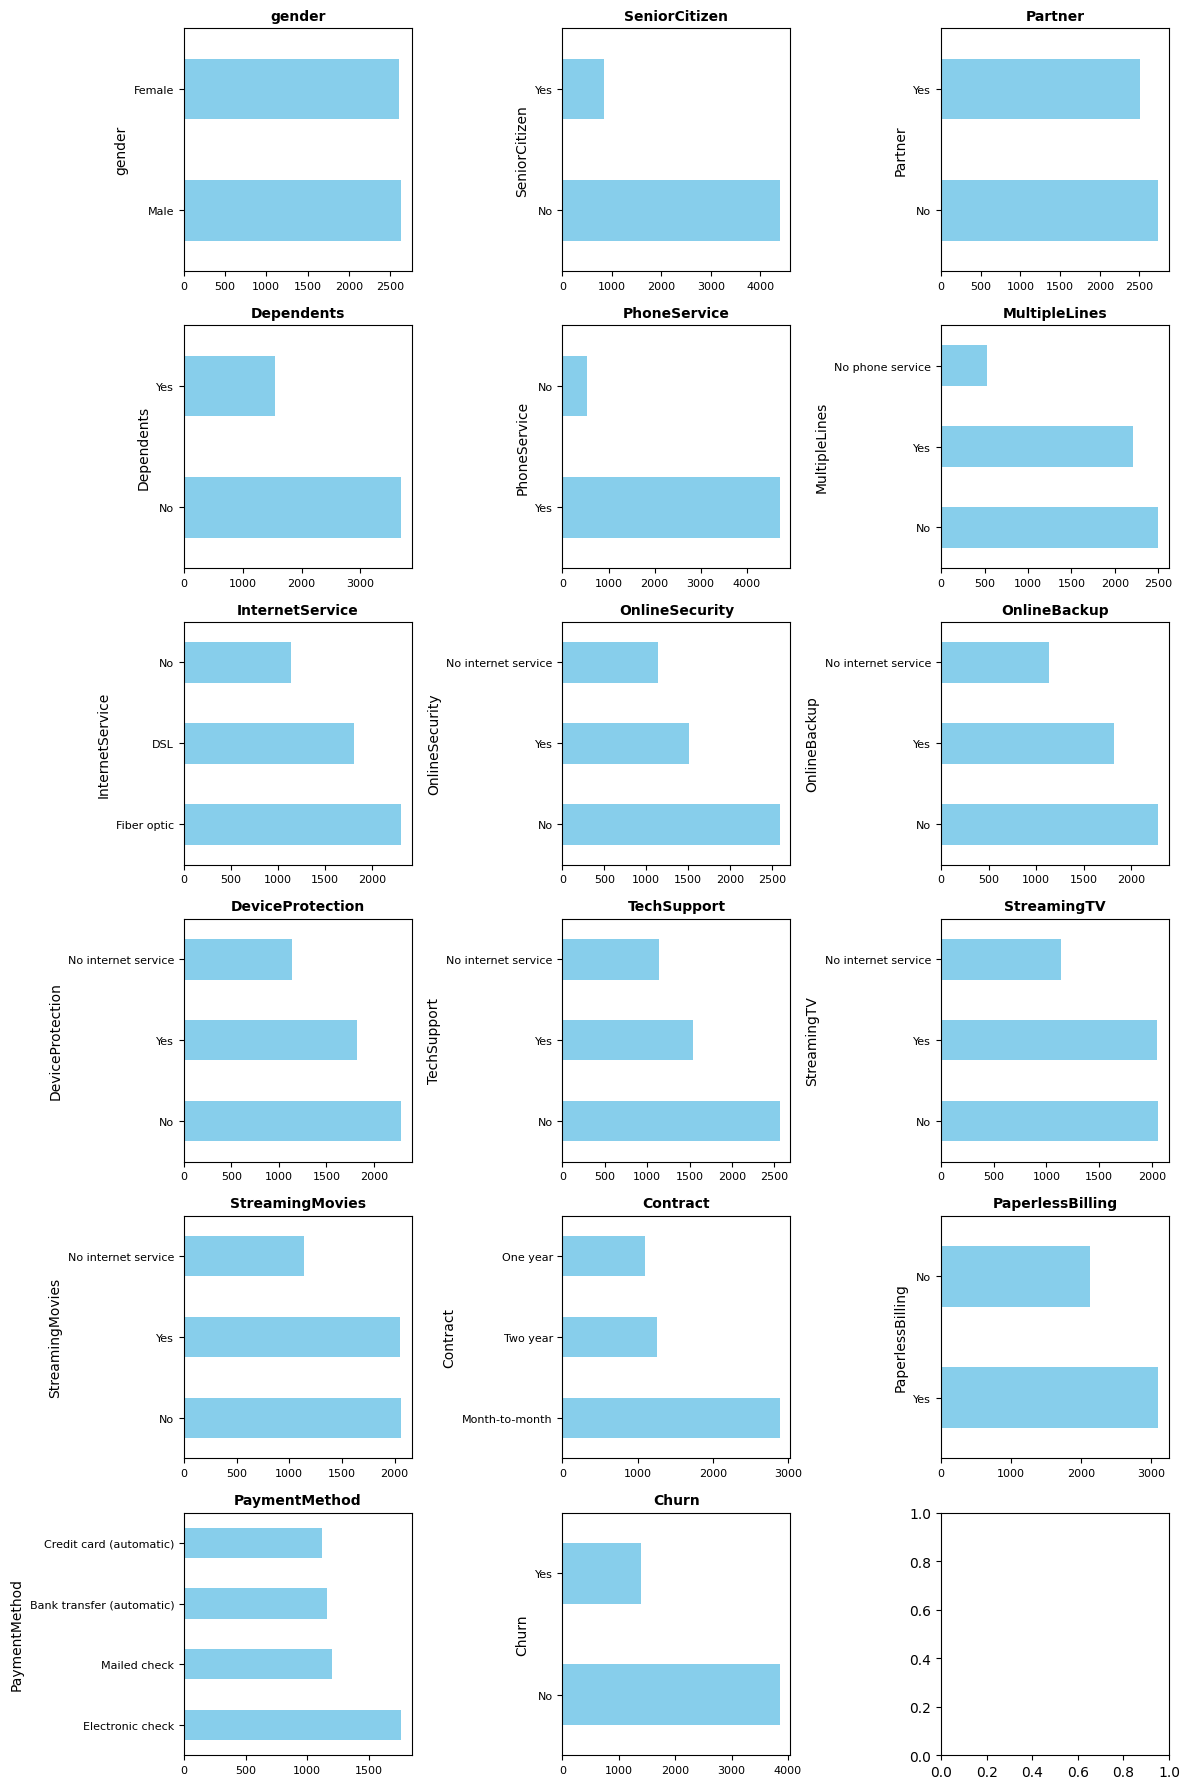

In [20]:
graficos_eda_categoricos(df, columnas_excluir=['customerID'])

La variable objetivo se encuentra desbalanceada en cuanto a la distribución de sus valores, teniendo en cuenta que es normal, puesto que existen más personas que actualmente constan con el servicio en comparación con las que han desistido del mismo. Esto debe ser tomado a consideración antes de modelar, pues existes algoritmos como SVM que pueden verse afectados por este desbalance.

Se prosigue con el procesamiento de datos.

# **PREPROCESAMIENTO DE DATOS**

In [21]:
#Información general del df para verificar si estos se encuentran tipificados correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5243 non-null   object 
 1   gender            5243 non-null   object 
 2   SeniorCitizen     5243 non-null   object 
 3   Partner           5243 non-null   object 
 4   Dependents        5243 non-null   object 
 5   tenure            5243 non-null   int64  
 6   PhoneService      5243 non-null   object 
 7   MultipleLines     5243 non-null   object 
 8   InternetService   5243 non-null   object 
 9   OnlineSecurity    5243 non-null   object 
 10  OnlineBackup      5243 non-null   object 
 11  DeviceProtection  5243 non-null   object 
 12  TechSupport       5243 non-null   object 
 13  StreamingTV       5243 non-null   object 
 14  StreamingMovies   5243 non-null   object 
 15  Contract          5243 non-null   object 
 16  PaperlessBilling  5243 non-null   object 


Para proseguir con el modelado es necesario que los valores numéricos estén en el mismo escalado o normalizados para que las variables no generen sesgos por la diferencia de escalas.

(NOTA: Al momento de iniciar el proyecto no tenía muy claro como abordar este punto, con una pequeña revisión bibliográfica. He decidido escalar los valores con el método de StandardScaler y al iterar el modelo fue la que mayor puntaje de acurracy me ha dado en comparación con la normalización de valores)

In [22]:
# ESCALADORES
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Standard Scaler
escalador = StandardScaler()
df[numeric_cols] = escalador.fit_transform(df[numeric_cols]) # Tomar valores numericos'''

In [23]:
'''
Opcional: Normalización de valores
from sklearn.preprocessing import Normalizer

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalizar solo las columnas numéricas
norm = Normalizer()
df[numeric_cols] = norm.fit_transform(df[numeric_cols])'''

"\nOpcional: Normalización de valores\nfrom sklearn.preprocessing import Normalizer\n\nnumeric_cols = df.select_dtypes(include=['float64', 'int64']).columns\n\n# Normalizar solo las columnas numéricas\nnorm = Normalizer()\ndf[numeric_cols] = norm.fit_transform(df[numeric_cols])"

In [24]:
#Verifica que los caracterisitcas númericas esten estandarizadas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1951-IEYXM,Male,No,Yes,Yes,1.611424,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.853899,1.817982,No
1,7041-TXQJH,Female,No,No,No,0.189898,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),-0.815950,-0.355643,No
2,0621-HJWXJ,Female,No,Yes,No,1.245889,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.554055,1.199224,No
3,6133-OZILE,Female,No,No,No,-0.581787,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,-0.981609,-0.737353,No
4,3657-COGMW,Female,Yes,No,No,0.799124,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1.433707,1.554086,No


Para continuar con el preprocesamiento se debe verificar de cuantos valores únicos consta el dataset, esto con la finalidad que el modelo al recibir los valores que servirán como predictores sean numéricos para lo cual se ha abordado con un label enconder para no sobredimensionar el dataset y el costo computacional del mismo.

In [25]:
#Verifica los valores unicos
df.nunique()

,0
customerID,5243
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


(NOTA: ¿Por qué he usado label enconder?, dado que las variables no exceden de más de 3 categorías en algunos casos menos y en el caso del ID de cliente es la única con muchas categorías, lo veo más factible que realizar un dummies)

In [26]:
# Crear una instancia de LabelEncoder
transformador = LabelEncoder()

cat = df.select_dtypes('O')

for col in cat:
    df[col] = transformador.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,982,1,0,1,1,1.611424,1,2,0,2,...,2,2,2,2,2,1,1,0.853899,1.817982,0
1,3725,0,0,0,0,0.189898,0,1,0,0,...,2,0,0,2,0,1,1,-0.815950,-0.355643,0
2,318,0,0,1,0,1.245889,1,2,1,0,...,0,0,0,0,0,1,0,0.554055,1.199224,0
3,3239,0,0,0,0,-0.581787,0,1,0,0,...,2,2,0,0,0,1,2,-0.981609,-0.737353,0
4,1903,0,1,0,0,0.799124,1,2,1,2,...,2,0,2,2,0,0,1,1.433707,1.554086,0


Una vez que se han convertido los valores categóricos en labels, es recomendable realizar una matriz de correlación para verificar colinealidad o correlaciones que tal vez pasan desapercibidas e incluso para poder realizar un PCA dado el caso de que la dimensionalidad del dataset se haya expandido.

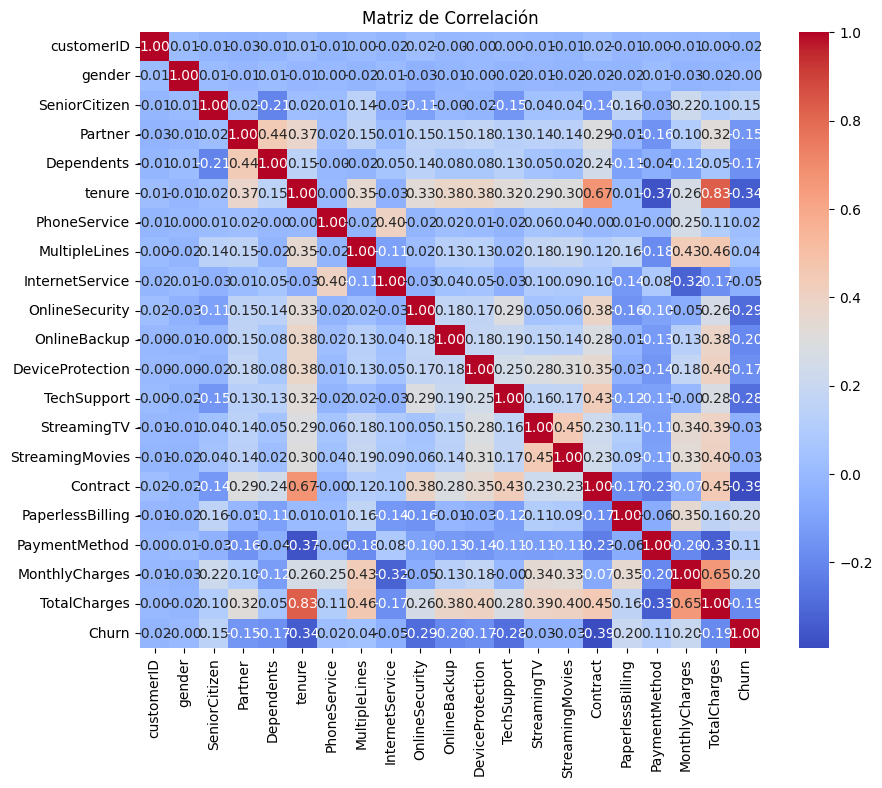

In [27]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

(NOTA: Como consideración posterior se ve que las variables contract y tenure contiene una mayor ponderación, por lo cual realizar un PCA sería recomendable, pero dado la dimensionalidad lo omitiré por lo pronto)

# **División de datos**

Para empezar con el modelado dividamos el dataset en valores de entrenamiento y valores de testeo, en este caso se ha optado por un 70% de valores de entrenamiento y 30 para testing.

In [28]:
#'Churn' es la variable dependiente, así que elimínala. Copiando el resto de las columnas a `X`.
X = df.drop('Churn', axis=1)

#Copiando la columna 'Churn' por sí sola en el DataFrame `y`. Esta es la variable dependiente.
y = df[['Churn']]

In [29]:
#Division de valores 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Ahora sí empecemos con el meollo del asunto que es prácticamente el cuerpo de este proyecto, el modelado y su interminable iteración.

# **ENTRENAMIENTO**

# **REGRESIÓN LOGÍSTICA**

Entrenamiento

In [30]:
# Incializamos el modelo usando parametros default
logreg = LogisticRegression(random_state=16)

# Entrenamos el modelo con los datos
logreg.fit(X_train, y_train)

# Probamos el modelo
y_predlog = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluación

In [31]:

accuracylog = accuracy_score(y_test, y_predlog)
print(f"Accuracy: {accuracylog}")

Accuracy: 0.810553083280356


In [32]:

conf_matrixlog = confusion_matrix(y_test, y_predlog)
print(conf_matrixlog)

[[1036  142]
 [ 156  239]]


In [33]:

class_reportlog = classification_report(y_test, y_predlog)
print(class_reportlog)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1178
           1       0.63      0.61      0.62       395

    accuracy                           0.81      1573
   macro avg       0.75      0.74      0.75      1573
weighted avg       0.81      0.81      0.81      1573



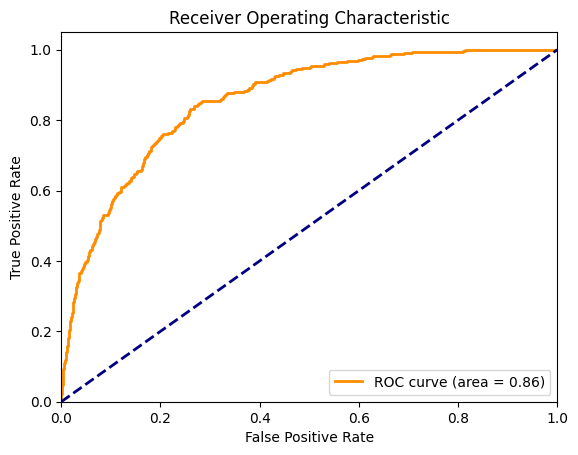

In [34]:
# Obtener las probabilidades de predicción
pred = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

El modelo entrenado por regresión logistica nos ha dado un buen acurracy: 0.81 (El mejor de todos los modelos), y una curva de ROC apreciablemente buena AUC:0.86, pero con los valores de clase 1 en la variable Churn, que predicen exactamente lo que se necesita en este proyecto un bajo nivel de predicción. Esto puede ser mejorado ajustando algunos parametros.

# **SVM**

In [35]:
svm_model = SVC(C=1.0, kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
#y_predsvm = svm_model.predict_proba(X_test) # This line was causing the issue
y_predsvm = svm_model.predict(X_test) # Changed to predict to get class labels

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Evaluación del modelo

accuracysvm = accuracy_score(y_test, y_predsvm)
print(f"Accuracy: {accuracysvm}")

# Matriz de confusión
conf_matrixsvm = confusion_matrix(y_test, y_predsvm)
print(conf_matrixsvm)

#Metricas de evaluación
class_reportsvm = classification_report(y_test, y_predsvm)
print(class_reportsvm)

Accuracy: 0.5155753337571519
[[612 566]
 [196 199]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1178
           1       0.26      0.50      0.34       395

    accuracy                           0.52      1573
   macro avg       0.51      0.51      0.48      1573
weighted avg       0.63      0.52      0.55      1573



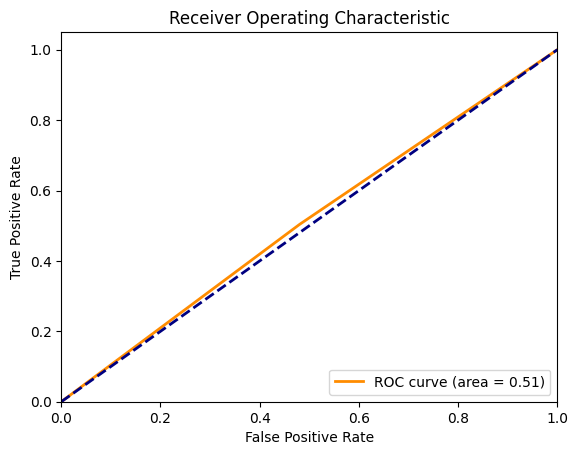

In [37]:
# Obtener las probabilidades de predicción
prediction = svm_model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_predsvm)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

En cuanto a SVM se me advirtió que no entrenaría bien el modelo puesto el desbalance de clases en la variable objetivo y lo quise intentar, pero falle estrepitosamente, a pesar de realizar algunos ajustes al modelo, no pude entrenarlo, si al lector ha considerado alguna recomendación o correción hagamelo saber.

# **ARBOL DE DESICIÓN**

In [38]:
arbdec = DecisionTreeClassifier(max_depth=4)

#Entrenar
arbdec.fit(X_train, y_train)
# Predicción
y_predad = arbdec.predict_proba(X_test)[:, 1] # Selecting the probability for class 1 only


In [39]:
# Convertir las probabilidades a clases (0 o 1) con un umbral de 0.5
y_pred_classes = (y_predad >= 0.5).astype(int)

# Calcular la precisión
accuracyarb = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracyarb}")

Accuracy: 0.7984742530197075


In [40]:
#Matriz de confución
conf_matrixarb = confusion_matrix(y_test, y_pred_classes)
print(conf_matrixarb)

[[1059  119]
 [ 198  197]]


In [41]:
#Metricas de evaluación
class_reportarb = classification_report(y_test, y_pred_classes)
print(class_reportarb)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1178
           1       0.62      0.50      0.55       395

    accuracy                           0.80      1573
   macro avg       0.73      0.70      0.71      1573
weighted avg       0.79      0.80      0.79      1573



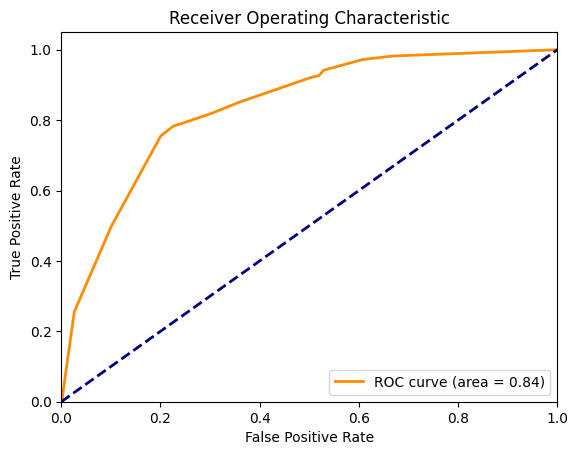

In [42]:
# Obtener las probabilidades de predicción
pred = arbdec.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

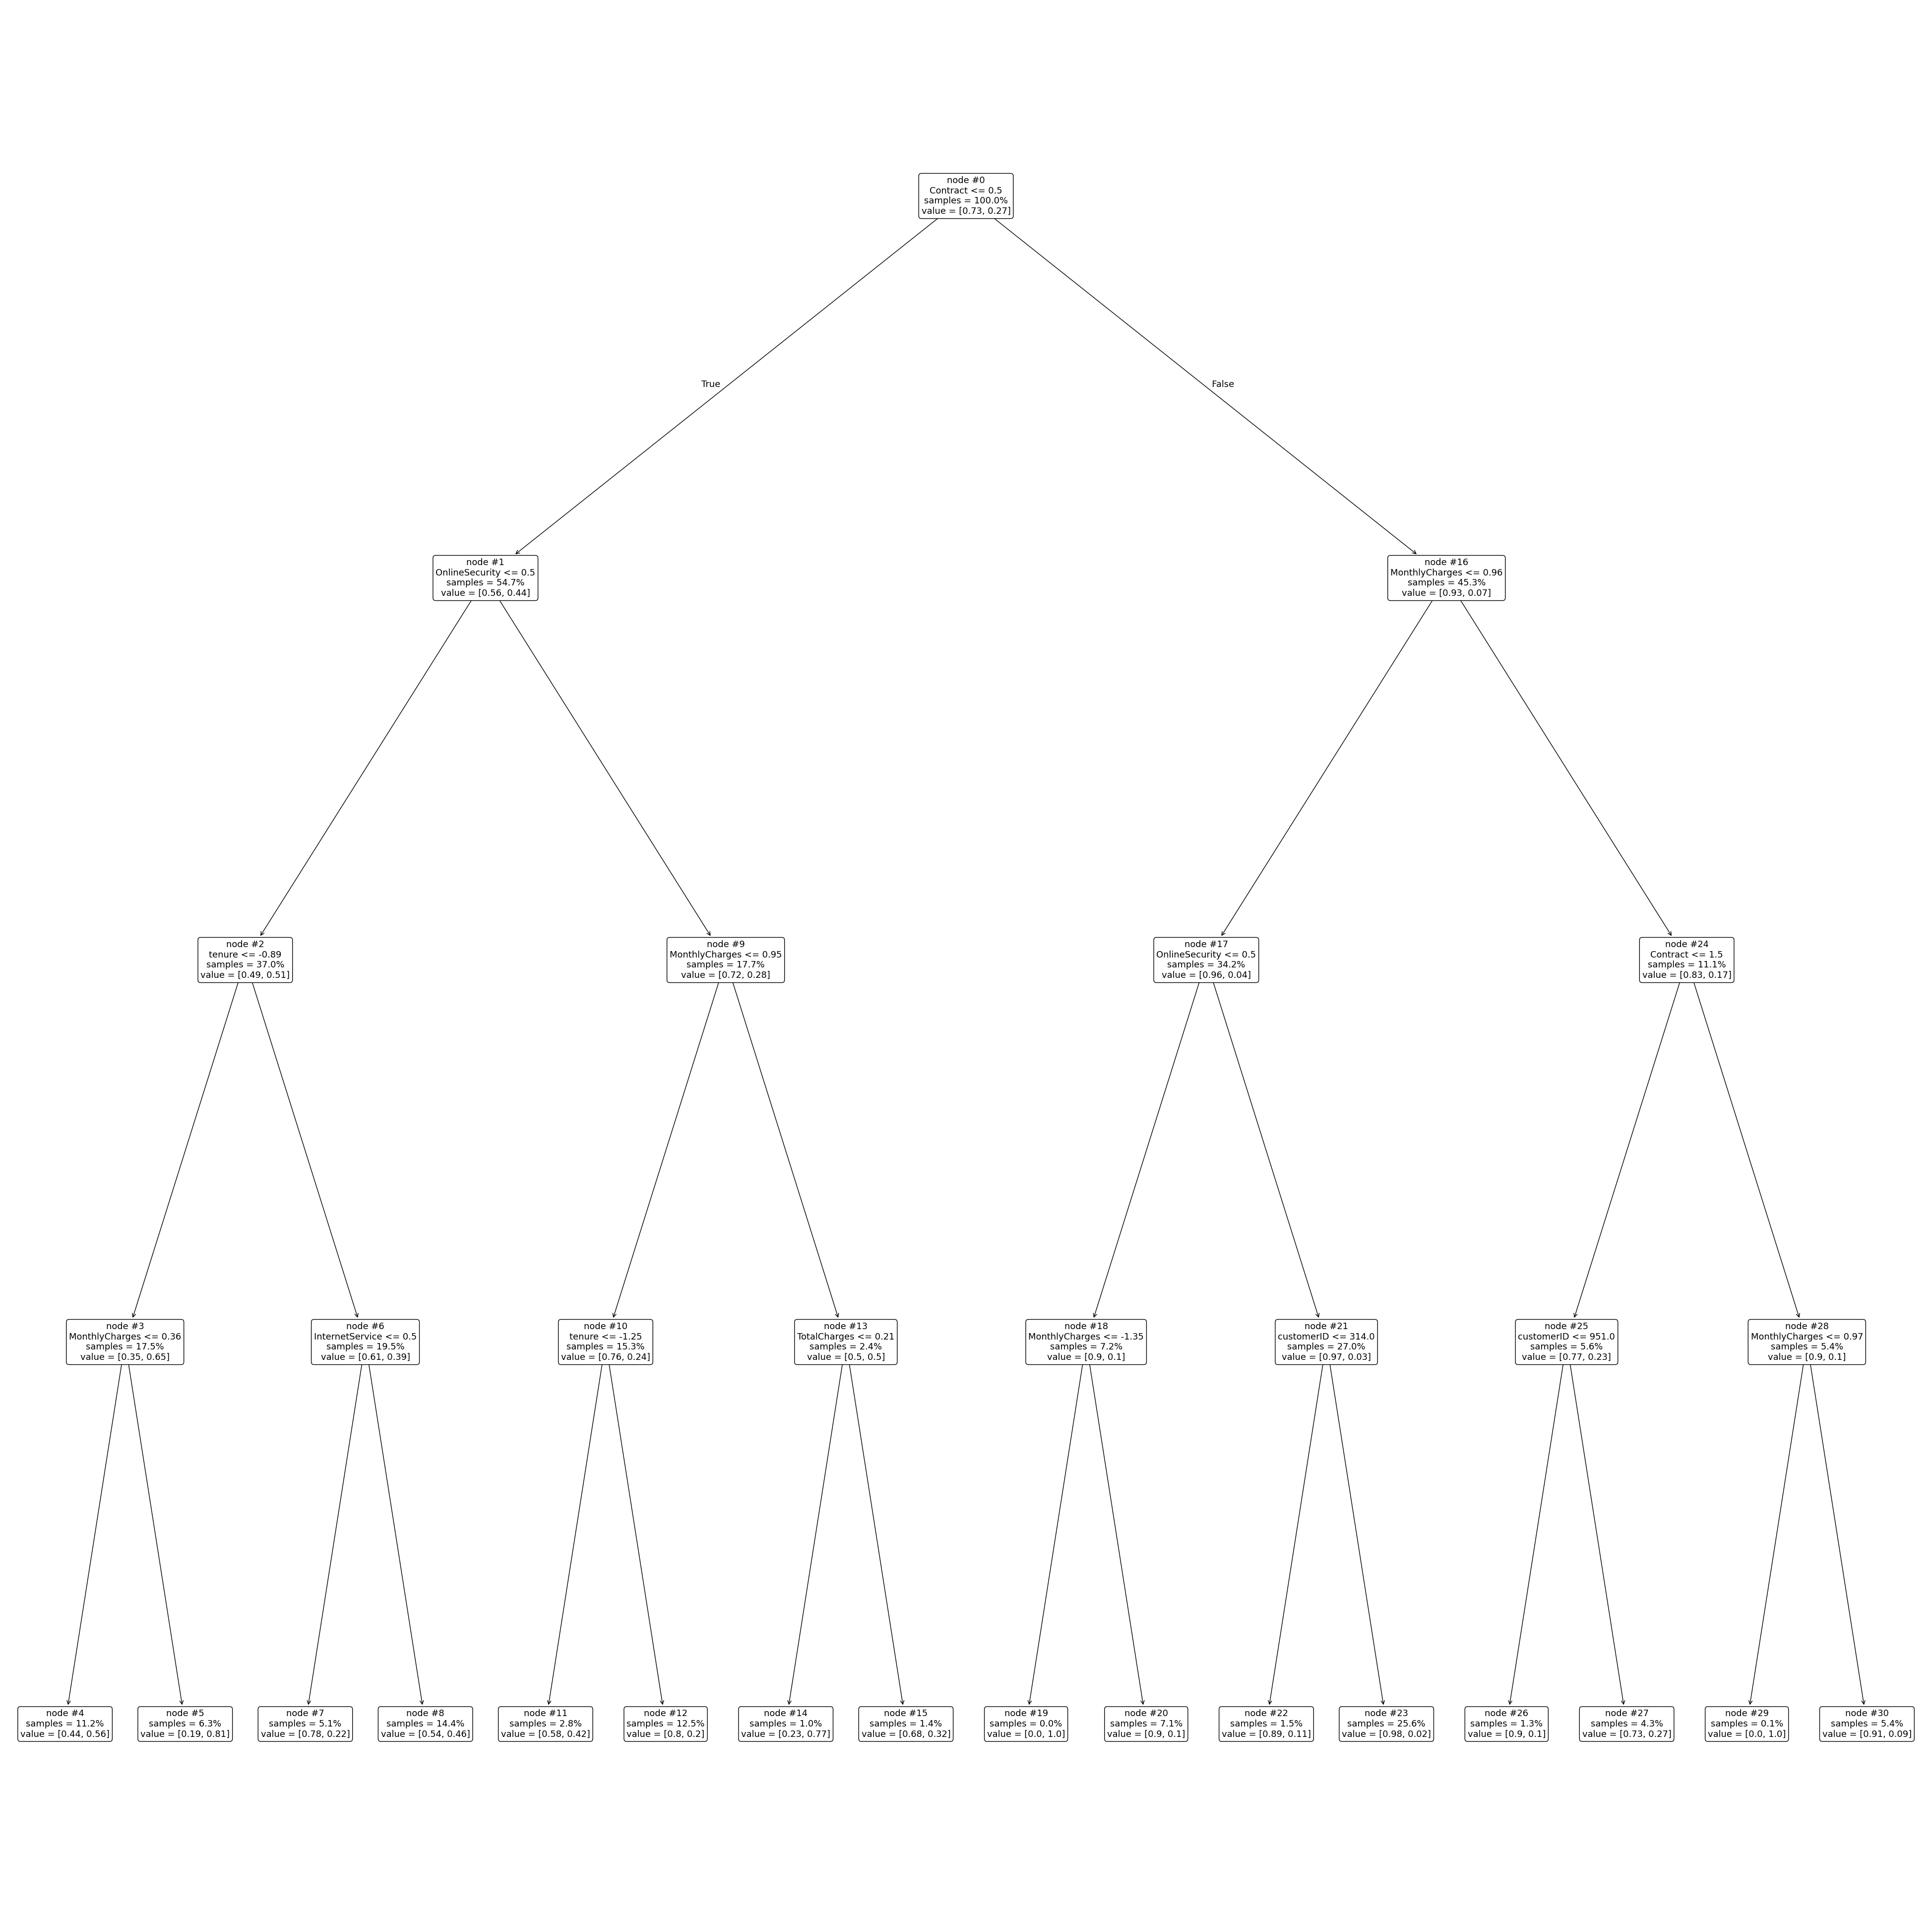

In [43]:
from sklearn.tree import plot_tree
#grafica el árbol de decisión y sus ramificaciiones
plt.figure(figsize = (50,50))

plot_tree(arbdec,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

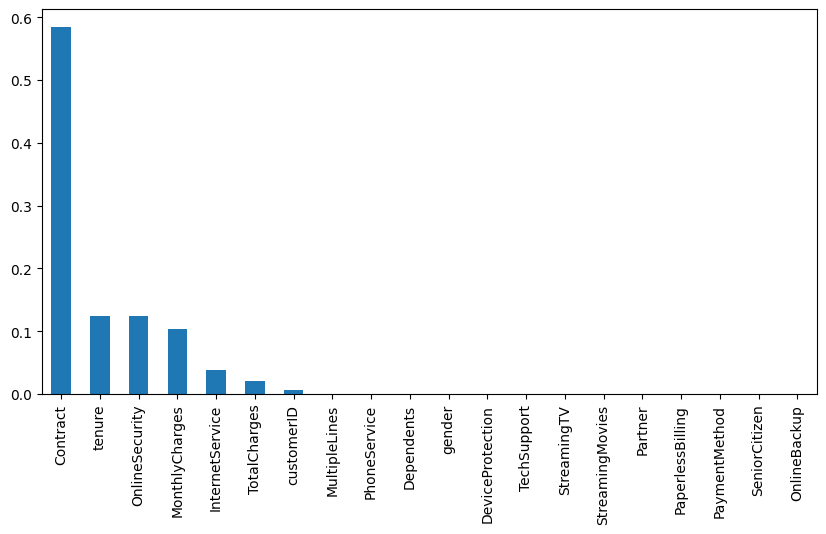

In [44]:
#Importancia de las variables para predecir en el modelo
pd.Series(arbdec.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5));

A consideración tras entrenar el modelo con el algoritmo arbol de decisión se tiene un acurracy algo menor, se observa que al parecer la variable contract es la que mayor relevancia tiene que ver con la descersión de clientes, seguido de tenure y onlinesecurity que son las que mayor varianza tiene, esto se puede verificar con VIF. En cuanto a sus metricas de evaluación no mejoran en comparación a regresión logistica.

# **RANDOM FOREST**

In [45]:
#Se instancia el modelo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=16)

In [46]:
#Entrena el modelo con random forest
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=16)

In [47]:
#Instancia las predicciones del modelo
y_pred_rf = rf_model.predict(X_test)

In [48]:
# Exactitud
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Reporte de clasificación
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy: 0.8016528925619835
Confusion Matrix:
[[1058  120]
 [ 192  203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1178
           1       0.63      0.51      0.57       395

    accuracy                           0.80      1573
   macro avg       0.74      0.71      0.72      1573
weighted avg       0.79      0.80      0.79      1573



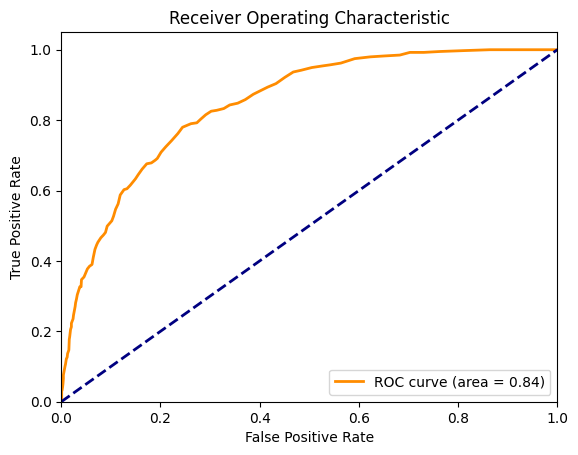

In [49]:
# Obtener las probabilidades de predicción
pred = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Tras el entrenamiento y análisis del modelo Random Forest podemos denotar que tenemos un accuracy de 0.8023 lo que demuestra que es un modelo más ajustable a los datos que árbol de decisión, para este punto realizar un Grid Search mejoraría el abordaje del proyecto, lo cual realizaré a posteriori.

De el concurso de Kaggle del cual se descargo el dataset consta con un dataset de testeo para su evaluación a continuación se detalla el testeo.

# **Testeo**

En resumen el csv proporcionado se realizan los mismos paso de preprocesamiento que el dataset anterior.

In [50]:
#Instanciar el csv desde Drive
df_test = pd.read_csv('/content/drive/MyDrive/DataSets/Churntest.csv')

In [51]:
#Extrae los primero 5 registros del csv
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0665-XHDJU,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Electronic check,99.40,7285.7
1,2746-DIJLO,Female,0,No,No,41,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Credit card (automatic),56.30,2364
2,3207-OYBWH,Male,1,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.25,5427.05
3,0895-LMRSF,Male,0,No,No,23,Yes,No,DSL,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),64.90,1509.8
4,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4


In [52]:
#informacion general del csv de testeo
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1800 non-null   object 
 1   gender            1800 non-null   object 
 2   SeniorCitizen     1800 non-null   int64  
 3   Partner           1800 non-null   object 
 4   Dependents        1800 non-null   object 
 5   tenure            1800 non-null   int64  
 6   PhoneService      1800 non-null   object 
 7   MultipleLines     1800 non-null   object 
 8   InternetService   1800 non-null   object 
 9   OnlineSecurity    1800 non-null   object 
 10  OnlineBackup      1800 non-null   object 
 11  DeviceProtection  1800 non-null   object 
 12  TechSupport       1800 non-null   object 
 13  StreamingTV       1800 non-null   object 
 14  StreamingMovies   1800 non-null   object 
 15  Contract          1800 non-null   object 
 16  PaperlessBilling  1800 non-null   object 


In [53]:
df_test['TotalCharges'] = df_test['TotalCharges'].replace(' ', np.nan)
df_test['TotalCharges'] = df_test['TotalCharges'].astype('float64')
df_test.isnull().values.any()

True

In [54]:
nan_counts = df_test.isnull().sum()
print(nan_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64


In [55]:
median_value = df_test['TotalCharges'].median()
df_test['TotalCharges'] = df_test['TotalCharges'].fillna(median_value)
nan_counts = df_test.isnull().sum()
print(nan_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [56]:
# Crear una instancia de LabelEncoder
transformador = LabelEncoder()

cat = df_test.select_dtypes('O')

for col in cat:
    df_test[col] = transformador.fit_transform(df_test[col])

El entregable es un dataframe con los valores de ID del cliente y la prediccion que entrega el modelo y a continuacion se concatena los dataframes

In [57]:
y_predlog = logreg.predict(df_test)

In [58]:
df_1 = pd.read_csv('/content/drive/MyDrive/DataSets/Churntest.csv')

In [59]:
df_1['Churn']=y_predlog

In [60]:
df_final = df_1[['customerID','Churn']]
df_final['Churn'] = df_final['Churn'].replace({0: 'No', 1: 'Sí'})
df_final.head(50)

<ipython-input-60-3a86d247e56d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].replace({0: 'No', 1: 'Sí'})


,customerID,Churn
0,0665-XHDJU,No
1,2746-DIJLO,No
2,3207-OYBWH,No
3,0895-LMRSF,No
4,5760-WRAHC,No
5,1187-WILMM,No
6,3454-JFUBC,No
7,5619-XZZKR,Sí
8,3313-QKNKB,No
9,7663-CUXZB,No


# **CONCLUSIONES**

* Con el modelo de regresión logistica obtuvimos un mejor acurracy que con los
anteriores modelos, incluso un mejor f1 score que nos ayudaran en una mejor predicción de los valores cercanos a la realidad, me decanto por el momento por este modelo, aunque deberíamos hacer algunas pruebas más ademas de realizar cross validation para poder otener mejores resultados, o implementar Grid Search en los demas algoritmos.

* Se debe tener a consideración tambien si el uso de escaladores o normalizadores influyen en los resultados.

* El modelo en general funciona bien, pero podría mejorar en la identificación de la clase 1. Es posible que necesites ajustar algunos parámetros del modelo o recolectar más datos para mejorar su desempeño en esta clase específica.

* En cuanto al modelo entrenado con SVM no encontré la solución para que el hiperplano pueda identificar mejor las clases.

**Realizado por: Wladimir Cabascango, 27-01-2025, email: wladimireder@gmail.com, contacto: +593939008880, Linkedin: www.linkedin.com/in/wladimir-cabascango-velásquez-79b79810a**